### 1. Import Libraries

In [100]:
import pandas as pd
import numpy as np


### 2.Load & inspect tables

In [101]:
monthly_target_trips = pd.read_csv("C:/Users/user/Downloads/RPC13_Input_For_Participants (1)/RPC13_Input_For_Participants/datasets/csv_files/monthly_target_trips.csv")
monthly_target_new_passengers = pd.read_csv("C:/Users/user/Downloads/RPC13_Input_For_Participants (1)/RPC13_Input_For_Participants/datasets/csv_files/monthly_target_new_passengers.csv")
fact_trips = pd.read_csv("C:/Users/user/Downloads/RPC13_Input_For_Participants (1)/RPC13_Input_For_Participants/datasets/csv_files/fact_trips.csv")
fact_passenger_summary = pd.read_csv("C:/Users/user/Downloads/RPC13_Input_For_Participants (1)/RPC13_Input_For_Participants/datasets/csv_files/fact_passenger_summary.csv")
dim_repeat_trip_distribution = pd.read_csv("C:/Users/user/Downloads/RPC13_Input_For_Participants (1)/RPC13_Input_For_Participants/datasets/csv_files/dim_repeat_trip_distribution.csv")
dim_date = pd.read_csv("C:/Users/user/Downloads/RPC13_Input_For_Participants (1)/RPC13_Input_For_Participants/datasets/csv_files/dim_date.csv")
dim_city = pd.read_csv("C:/Users/user/Downloads/RPC13_Input_For_Participants (1)/RPC13_Input_For_Participants/datasets/csv_files/dim_city.csv")
city_target_passenger_rating = pd.read_csv("C:/Users/user/Downloads/RPC13_Input_For_Participants (1)/RPC13_Input_For_Participants/datasets/csv_files/city_target_passenger_rating.csv")




can check head(), info(), describe() to know about tables

In [102]:
fact_trips.head(1)

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5


In [103]:
fact_passenger_summary.head()

,month,city_id,new_passengers,repeat_passengers,total_passengers
0,2024-01-01,AP01,2513,650,3163
1,2024-01-01,CH01,3920,720,4640
2,2024-01-01,GJ01,2432,1184,3616
3,2024-01-01,GJ02,2089,544,2633
4,2024-01-01,KA01,1957,172,2129


### 3. Data Cleaning

ensuring to clean the required tables which are necessary for the given problem statement. 

In [104]:
fact_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trip_id                 425903 non-null  object
 1   date                    425903 non-null  object
 2   city_id                 425903 non-null  object
 3   passenger_type          425903 non-null  object
 4   distance_travelled(km)  425903 non-null  int64 
 5   fare_amount             425903 non-null  int64 
 6   passenger_rating        425903 non-null  int64 
 7   driver_rating           425903 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 26.0+ MB


mainly our data is cleaned!

some minimal changes are required like - rename columns, changing datetypes and such more. these changes we can do after merging tables!

### 4. Merge tables for ML

In [105]:
# Start from fact_trips (base table)
fare_df = fact_trips.copy()


In [106]:
fare_df.shape

(425903, 8)

In [107]:
# Merge city name (static dimension)
fare_df = fare_df.merge(
    dim_city,
    on='city_id',
    how='left'
)


In [108]:
fare_df.shape

(425903, 9)

In [109]:
fare_df.columns

Index(['trip_id', 'date', 'city_id', 'passenger_type',
       'distance_travelled(km)', 'fare_amount', 'passenger_rating',
       'driver_rating', 'city_name'],
      dtype='object')

In [110]:
dim_date.head()

,date,start_of_month,month_name,day_type
0,2024-01-01,2024-01-01,January,Weekday
1,2024-01-02,2024-01-01,January,Weekday
2,2024-01-03,2024-01-01,January,Weekday
3,2024-01-04,2024-01-01,January,Weekday
4,2024-01-05,2024-01-01,January,Weekday


In [111]:
# Merge date features
fare_df = fare_df.merge(
    dim_date[['date', 'month_name', 'day_type']],
    on='date',
    how='left'
)


In [112]:
fare_df.shape

(425903, 11)

In [113]:
fare_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trip_id                 425903 non-null  object
 1   date                    425903 non-null  object
 2   city_id                 425903 non-null  object
 3   passenger_type          425903 non-null  object
 4   distance_travelled(km)  425903 non-null  int64 
 5   fare_amount             425903 non-null  int64 
 6   passenger_rating        425903 non-null  int64 
 7   driver_rating           425903 non-null  int64 
 8   city_name               425903 non-null  object
 9   month_name              425903 non-null  object
 10  day_type                425903 non-null  object
dtypes: int64(4), object(7)
memory usage: 35.7+ MB


In [114]:
fare_df.head()


,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating,city_name,month_name,day_type
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5,Lucknow,January,Weekend
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5,Vadodara,January,Weekday
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8,Coimbatore,January,Weekend
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10,Kochi,March,Weekday
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8,Visakhapatnam,June,Weekend


### 5. Data cleaning on merged table

Dropped irrelevant columns: trip_id, city_id, date

Renamed columns for clarity: distance_km, day_category, etc.

Converted dates to datetime, extracted day, weekday, week, month_num

In [115]:
# Drop post-trip or irrelevant columns (leakage)
fare_df = fare_df.drop(['trip_id', 'passenger_rating', 'driver_rating'], axis=1)


In [116]:
# Rename columns for clarity
fare_df = fare_df.rename(columns={
    'distance_travelled(km)': 'distance_km',
    'fare_amount': 'fare',
    'month_name': 'month',
    'day_type': 'day_category'
})

In [117]:
fare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            425903 non-null  object
 1   city_id         425903 non-null  object
 2   passenger_type  425903 non-null  object
 3   distance_km     425903 non-null  int64 
 4   fare            425903 non-null  int64 
 5   city_name       425903 non-null  object
 6   month           425903 non-null  object
 7   day_category    425903 non-null  object
dtypes: int64(2), object(6)
memory usage: 26.0+ MB


In [118]:
# Convert date column
fare_df['date'] = pd.to_datetime(fare_df['date'])

# Extract day, weekday, week number, month number
fare_df['day'] = fare_df['date'].dt.day
fare_df['weekday'] = fare_df['date'].dt.weekday   # 0=Mon, 6=Sun
fare_df['week'] = fare_df['date'].dt.isocalendar().week
fare_df['month_num'] = fare_df['date'].dt.month

In [119]:
fare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            425903 non-null  datetime64[ns]
 1   city_id         425903 non-null  object        
 2   passenger_type  425903 non-null  object        
 3   distance_km     425903 non-null  int64         
 4   fare            425903 non-null  int64         
 5   city_name       425903 non-null  object        
 6   month           425903 non-null  object        
 7   day_category    425903 non-null  object        
 8   day             425903 non-null  int32         
 9   weekday         425903 non-null  int32         
 10  week            425903 non-null  UInt32        
 11  month_num       425903 non-null  int32         
dtypes: UInt32(1), datetime64[ns](1), int32(3), int64(2), object(5)
memory usage: 32.9+ MB


In [120]:
# Drop columns not needed for modeling (IDs, raw date)
fare_df = fare_df.drop(['city_id', 'date', 'month'], axis=1)



In [121]:
fare_df.columns

Index(['passenger_type', 'distance_km', 'fare', 'city_name', 'day_category',
       'day', 'weekday', 'week', 'month_num'],
      dtype='object')

### 6. Feature engineering

seperating numerical and categorical features, and building pipelines

In [122]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [123]:
# creating a seperate table of all inputs-> then apply transformations on those columns only!
X_fare_df = fare_df.drop(columns=['fare'])
X_fare_df.columns

Index(['passenger_type', 'distance_km', 'city_name', 'day_category', 'day',
       'weekday', 'week', 'month_num'],
      dtype='object')

In [124]:
numeric_features = list(X_fare_df.select_dtypes(['number']).columns)
print("numeric_features:", numeric_features)

print()

categorical_features = list(X_fare_df.select_dtypes(exclude=['number']).columns)
print("categorical features: ", categorical_features)

numeric_features: ['distance_km', 'day', 'weekday', 'week', 'month_num']

categorical features:  ['passenger_type', 'city_name', 'day_category']


In [125]:
# Numeric transformer: scaling
numeric_transformer = StandardScaler()

# Categorical transformer: one-hot encoding
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)


In [126]:
categorical_transformer

OneHotEncoder(drop='first', sparse_output=False)

### 7. Pipeline and executing preprocessing

build and apply pipeline, converting result to dataframe, extracting y-variable

In [128]:
# combine using column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['distance_km', 'day', 'weekday', 'week',
                                  'month_num']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['passenger_type', 'city_name',
                                  'day_category'])])

In [129]:
# apply the pipeline to features

# Features (X) and target (y)
X = X_fare_df[numeric_features + categorical_features]
y = fare_df['fare']

# Transform features
X_prepared = preprocessor.fit_transform(X)

# Check final shape
X_prepared.shape


(425903, 16)

In [130]:
X_prepared

array([[-0.85623776, -0.31156112,  0.70713132, ...,  0.        ,
         0.        ,  1.        ],
       [-1.27765753,  1.52320738, -1.72303348, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85623776, -0.9995993 ,  1.19316428, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.72408639,  1.06451525,  1.19316428, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82944133, -1.68763749, -1.72303348, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.88299076, -0.65558021,  0.70713132, ...,  0.        ,
         0.        ,  1.        ]])

In [131]:
# all_columns = numeric_features + categorical_features
# all_columns

In [132]:

# # Convert ndarray to DataFrame
# X_prepared_df = pd.DataFrame(X_prepared, columns=all_columns)

# # Quick check
# X_prepared_df.head()

In [133]:
cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(cat_columns)
all_columns

['distance_km',
 'day',
 'weekday',
 'week',
 'month_num',
 'passenger_type_repeated',
 'city_name_Coimbatore',
 'city_name_Indore',
 'city_name_Jaipur',
 'city_name_Kochi',
 'city_name_Lucknow',
 'city_name_Mysore',
 'city_name_Surat',
 'city_name_Vadodara',
 'city_name_Visakhapatnam',
 'day_category_Weekend']

In [134]:

# Convert ndarray to DataFrame
X_prepared_df = pd.DataFrame(X_prepared, columns=all_columns)

# Quick check
X_prepared_df.head()

,distance_km,day,weekday,week,month_num,passenger_type_repeated,city_name_Coimbatore,city_name_Indore,city_name_Jaipur,city_name_Kochi,city_name_Lucknow,city_name_Mysore,city_name_Surat,city_name_Vadodara,city_name_Visakhapatnam,day_category_Weekend
0,-0.856238,-0.311561,0.707131,-1.515571,-1.454801,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.277658,1.523207,-1.723033,-1.108559,-1.454801,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.856238,-0.999599,1.193164,-1.651241,-1.454801,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.777636,1.064515,-1.723033,-0.023195,-0.262611,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.224108,-1.572964,1.193164,1.197839,1.525672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [135]:
X_prepared_df.shape

(425903, 16)

In [136]:
y = fare_df['fare']  # target variable


### 8. Train-test split

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_prepared_df, y, test_size=0.2, random_state=42
)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((340722, 16), (85181, 16), (340722,), (85181,))

In [138]:
X_prepared_df.columns

Index(['distance_km', 'day', 'weekday', 'week', 'month_num',
       'passenger_type_repeated', 'city_name_Coimbatore', 'city_name_Indore',
       'city_name_Jaipur', 'city_name_Kochi', 'city_name_Lucknow',
       'city_name_Mysore', 'city_name_Surat', 'city_name_Vadodara',
       'city_name_Visakhapatnam', 'day_category_Weekend'],
      dtype='object')

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize model
lr_model = LinearRegression()

# Train
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression MAE: {mae:.2f}")


Linear Regression RMSE: 28.32
Linear Regression MAE: 22.31


In [143]:
from sklearn.linear_model import Ridge, Lasso

# --- Ridge Regression ---
ridge = Ridge(alpha=1.0)  # alpha is regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Ridge RMSE: {rmse_ridge:.2f}, MAE: {mae_ridge:.2f}")

# --- Lasso Regression ---
lasso = Lasso(alpha=0.01)  # smaller alpha for less aggressive regularization
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"Lasso RMSE: {rmse_lasso:.2f}, MAE: {mae_lasso:.2f}")


Ridge RMSE: 28.32, MAE: 22.31
Lasso RMSE: 28.32, MAE: 22.30


In [144]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest MAE: {mae_rf:.2f}")


Random Forest RMSE: 0.00
Random Forest MAE: 0.00


<Axes: title={'center': 'Feature Importance'}>

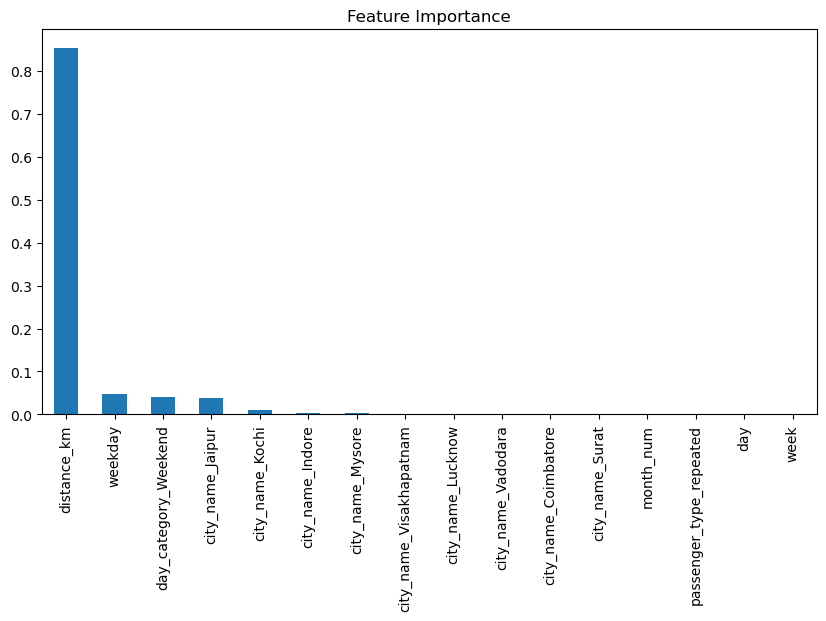

In [145]:

feat_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Feature Importance')


Random Forest RMSE: 5.06
Random Forest MAE: 2.39


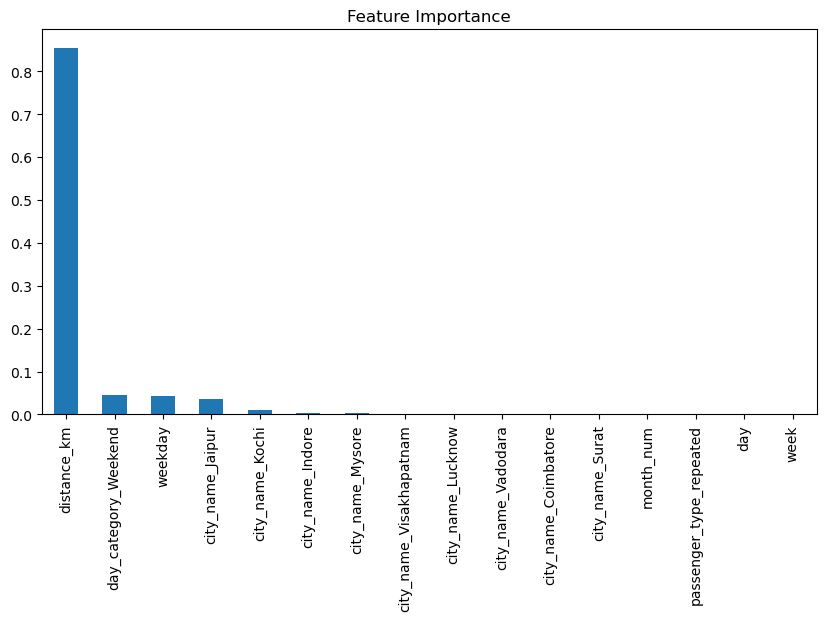

In [146]:

# Initialize model with limits to prevent overfitting
rf_model = RandomForestRegressor(
    n_estimators=100,       # number of trees
    max_depth=10,           # limit depth
    min_samples_split=10,   # minimum samples to split a node
    min_samples_leaf=5,     # minimum samples at leaf
    random_state=42,
    n_jobs=-1
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest MAE: {mae_rf:.2f}")

# Feature importance
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Feature Importance')
plt.show()


In [149]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(
    n_estimators=200,   # number of boosting stages
    learning_rate=0.1,  # step size shrinkage
    max_depth=5,        # max depth of individual trees
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Train
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f"Gradient Boosting RMSE: {rmse_gb:.2f}")
print(f"Gradient Boosting MAE: {mae_gb:.2f}")


Gradient Boosting RMSE: 1.39
Gradient Boosting MAE: 0.71


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Base model
gbr = GradientBoostingRegressor(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 5]
}

# GridSearch
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search.fit(X_train, y_train)

# Best model
best_gb = grid_search.best_estimator_

# Evaluate on test set
y_pred_best = best_gb.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("Best Parameters:", grid_search.best_params_)
print(f"Best Gradient Boosting RMSE: {rmse_best:.2f}")


In [ ]:
# Feature importance
feature_importance = best_gb.feature_importances_

# Create DataFrame
fi_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10,5))
plt.bar(fi_df['feature'], fi_df['importance'])
plt.xticks(rotation=90)
plt.title("Gradient Boosting Feature Importance")
plt.tight_layout()
plt.show()